In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
import re
from geopy.geocoders import Nominatim
from geopy import distance
import holidays

In [11]:
completed_orders_cleaned = pd.read_csv('../data/completed_orders_cleaned.csv')


In [13]:
completed_orders_cleaned.head

<bound method NDFrame.head of         trip_id                         trip_origin  \
0        391996  6.508813001668548,3.37740316890347   
1        391997                 6.4316714,3.4555375   
2        391998         6.631679399999999,3.3388976   
3        391999         6.572757200000001,3.3677082   
4        392001                 6.6010417,3.2766339   
...         ...                                 ...   
536015  1637696         6.448218499999999,3.4772075   
536016  1637702         6.442320899999999,3.4736868   
536017  1637704                  6.4281982,3.492248   
536018  1637705                 6.5869296,3.3632966   
536019  1637709         6.647209999999999,3.4851489   

                            trip_destination      trip_start_time  \
0                6.650969799999999,3.3450307  2021-07-01 07:28:04   
1            6.4280814653326,3.4721885847586  2021-07-01 06:38:04   
2                6.508324099999999,3.3590397  2021-07-01 06:21:02   
3                6.58488109999999

Create new features based on time and location, such as day of the week and hour of the day

In [17]:
completed_orders_cleaned['trip_start_time'] = pd.to_datetime(completed_orders_cleaned['trip_start_time'])

completed_orders_cleaned['Day of Week'] = completed_orders_cleaned['trip_start_time'].dt.dayofweek
completed_orders_cleaned['Hour of Day'] = completed_orders_cleaned['trip_start_time'].dt.hour

In [18]:
completed_orders_cleaned.head()

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,duration_min,distance,holiday,Day of Week,Hour of Day
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,1.550000,16.123451,False,3,7
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.400000,1.884305,False,3,6
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.350000,13.822393,False,3,6
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,13.583333,1.511034,False,3,7
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,20.984319,False,3,9


In [20]:
completed_orders_cleaned.nunique()

trip_id             536020
trip_origin         112142
trip_destination    147520
trip_start_time     513611
trip_end_time       513855
duration_min         23205
distance            467322
holiday                  2
Day of Week              7
Hour of Day             24
dtype: int64

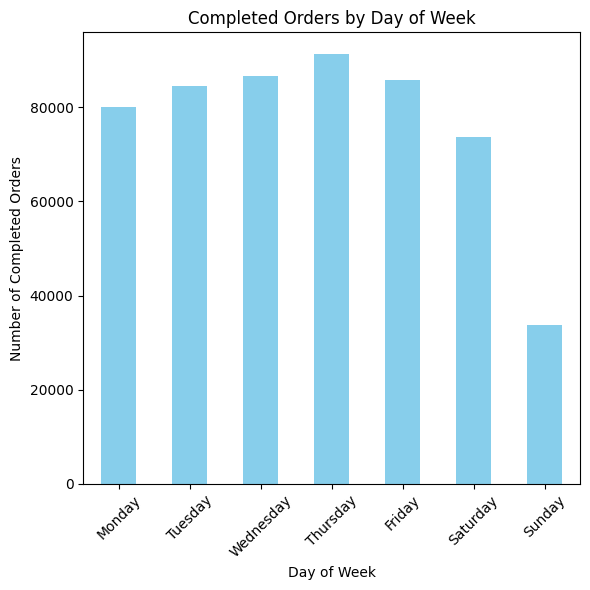

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named completed_orders_cleaned
# Convert Day of Week values to actual day names for better visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
completed_orders_cleaned['Day of Week'] = pd.Categorical(completed_orders_cleaned['Day of Week'], categories=day_names, ordered=True)

# Count the occurrences of each day of the week
day_of_week_counts = completed_orders_cleaned['Day of Week'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
day_of_week_counts.sort_index().plot(kind='bar', color='skyblue')  # Sort by the order of the day names
plt.title('Completed Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Completed Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

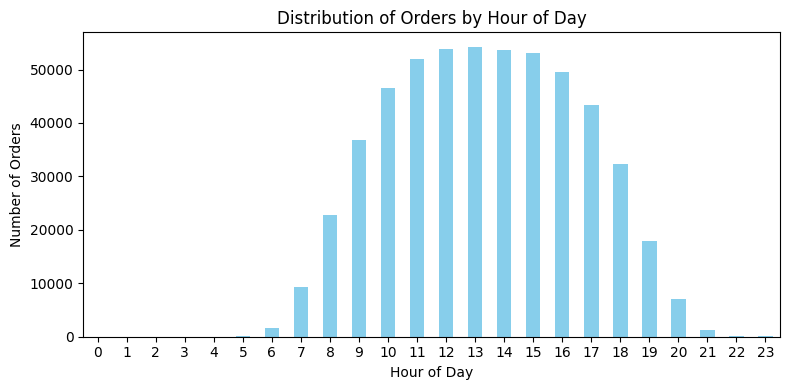

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named completed_orders_cleaned
# Count the occurrences of each hour of the day
hour_of_day_counts = completed_orders_cleaned['Hour of Day'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 4))
hour_of_day_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [31]:
completed_orders_cleaned.to_csv("../data/completed_orders_cleaned2.csv",index=False)